In [1]:
import pandas as pd

# 데이터 불러오기 (필요한 컬럼만 있는 parquet 파일)
승인매출정보 = pd.read_parquet("merged_승인매출정보.parquet")
회원정보 = pd.read_parquet("merged_회원정보.parquet")

# 승인매출정보에서 "_할부전환" 컬럼만 추출
할부전환_컬럼 = [col for col in 승인매출정보.columns if '_할부전환' in col]

print("할부전환 관련 컬럼 수:", len(할부전환_컬럼))
print("예시:", 할부전환_컬럼[:5])

할부전환 관련 컬럼 수: 4
예시: ['건수_할부전환_R6M', '건수_할부전환_R3M', '금액_할부전환_R6M', '금액_할부전환_R3M']


In [2]:
# ID + 할부전환 관련 컬럼만 추출
할부전환_df = 승인매출정보[['ID'] + 할부전환_컬럼]

# 고객 단위 평균
할부전환_고객 = 할부전환_df.groupby('ID').mean(numeric_only=True).reset_index()

In [3]:
# Segment 정보 병합
회원정보_sub = 회원정보[['ID', 'Segment']].drop_duplicates()
할부전환_고객 = pd.merge(할부전환_고객, 회원정보_sub, on='ID', how='left')

In [4]:
할부전환_세그 = 할부전환_고객.groupby('Segment')[할부전환_컬럼].mean().reset_index()

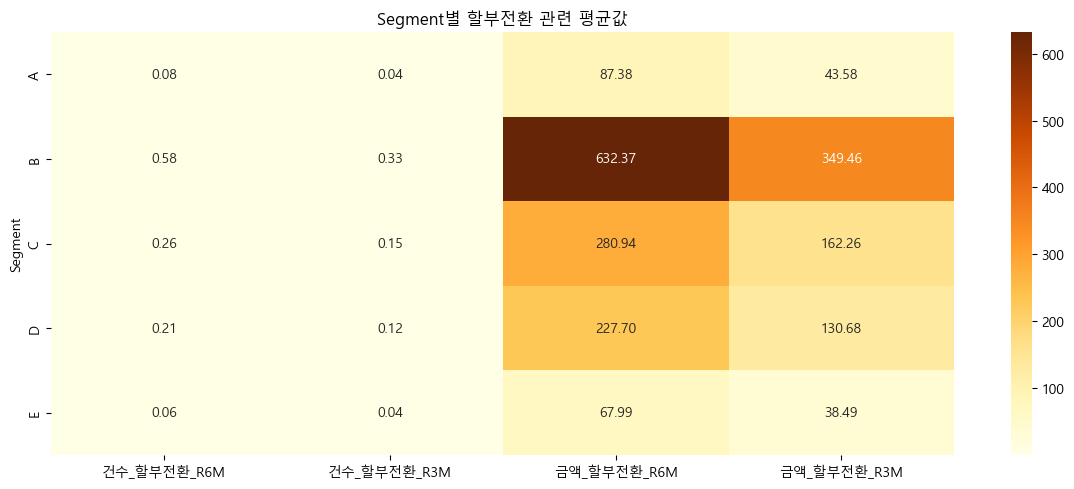

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 5))
sns.heatmap(할부전환_세그.set_index('Segment'), annot=True, fmt=".2f", cmap='YlOrBr')
plt.title("Segment별 할부전환 관련 평균값")
plt.tight_layout()
plt.show()

In [8]:
# 컬럼명 중 '연속무실적개월수_기본' 포함된 항목 추출
실적_컬럼 = [col for col in 승인매출정보.columns if '실적개월수' in col]

print("실적 관련 컬럼 수:", len(실적_컬럼))
print("예시:", 실적_컬럼[:5])

실적 관련 컬럼 수: 2
예시: ['연속무실적개월수_기본_24M_카드', '연속유실적개월수_기본_24M_카드']


In [10]:
# 고객 단위 평균
실적_df = 승인매출정보[['ID'] + 실적_컬럼]
실적_고객 = 실적_df.groupby('ID').mean(numeric_only=True).reset_index()

In [12]:
실적_고객 = pd.merge(실적_고객, 회원정보[['ID', 'Segment']], on='ID', how='left')

In [14]:
무적_세그 = 실적_고객.groupby('Segment')[실적_컬럼].mean().reset_index()

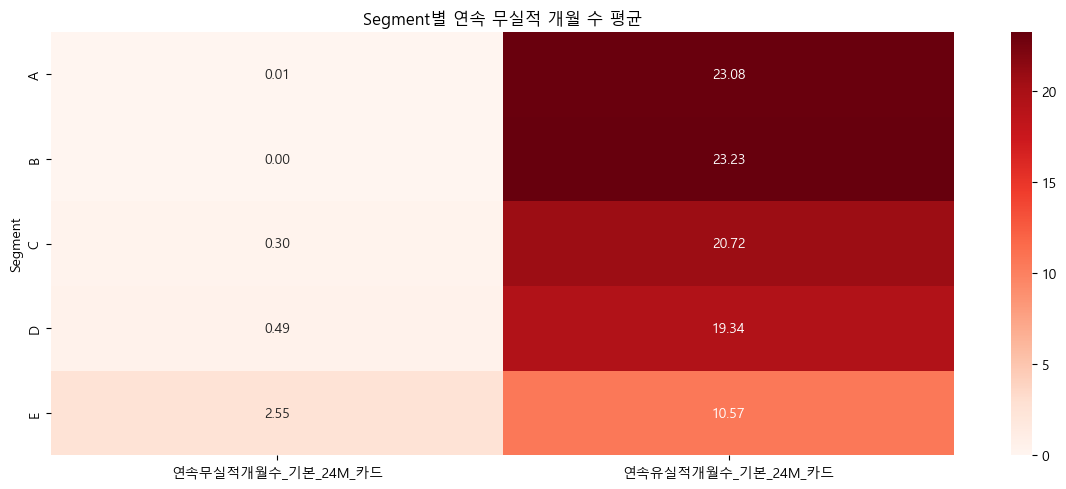

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 5))
sns.heatmap(무적_세그.set_index('Segment'), annot=True, fmt=".2f", cmap='Reds')
plt.title("Segment별 연속 무실적 개월 수 평균")
plt.tight_layout()
plt.show()

In [16]:
ATM_컬럼 = [col for col in 승인매출정보.columns if '_ATM' in col]

print("ATM 관련 컬럼 수:", len(ATM_컬럼))
print("예시:", ATM_컬럼[:5])

ATM 관련 컬럼 수: 4
예시: ['신청건수_ATM_CA_B0', '신청건수_ATM_CL_B0', '신청건수_ATM_CA_R6M', '신청건수_ATM_CL_R6M']


In [18]:
ATM_df = 승인매출정보[['ID'] + ATM_컬럼]
ATM_고객 = ATM_df.groupby('ID').mean(numeric_only=True).reset_index()

In [19]:
ATM_고객 = pd.merge(ATM_고객, 회원정보[['ID', 'Segment']], on='ID', how='left')

In [20]:
ATM_세그 = ATM_고객.groupby('Segment')[ATM_컬럼].mean().reset_index()

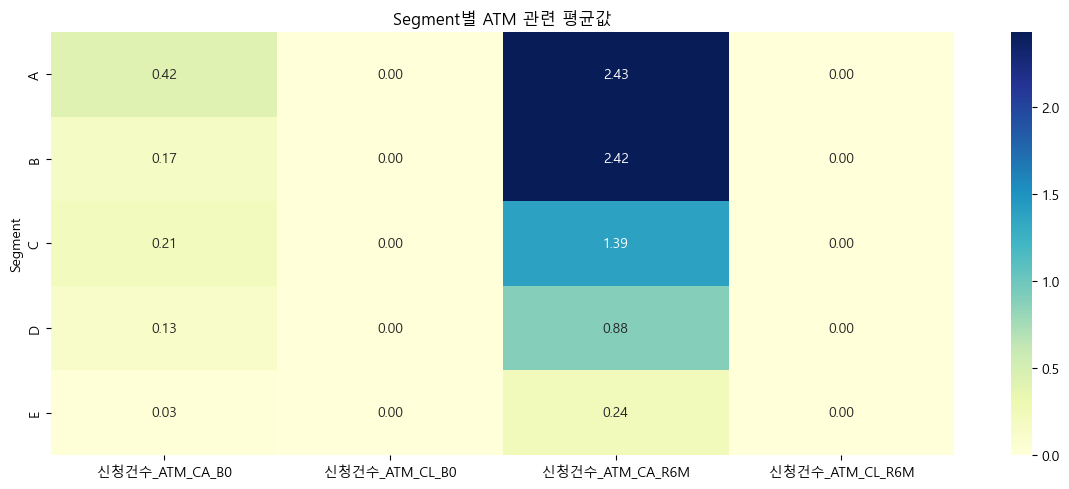

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 5))
sns.heatmap(ATM_세그.set_index('Segment'), annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("Segment별 ATM 관련 평균값")
plt.tight_layout()
plt.show()

In [22]:
승인거절_컬럼 = [col for col in 승인매출정보.columns if '승인거절건수_' in col]

print("승인거절 관련 컬럼 수:", len(승인거절_컬럼))
print("예시:", 승인거절_컬럼[:5])

승인거절 관련 컬럼 수: 10
예시: ['승인거절건수_B0M', '승인거절건수_한도초과_B0M', '승인거절건수_BL_B0M', '승인거절건수_입력오류_B0M', '승인거절건수_기타_B0M']


In [23]:
거절_df = 승인매출정보[['ID'] + 승인거절_컬럼]
거절_고객 = 거절_df.groupby('ID').mean(numeric_only=True).reset_index()

In [24]:
거절_고객 = pd.merge(거절_고객, 회원정보[['ID', 'Segment']], on='ID', how='left')

In [25]:
거절_세그 = 거절_고객.groupby('Segment')[승인거절_컬럼].mean().reset_index()

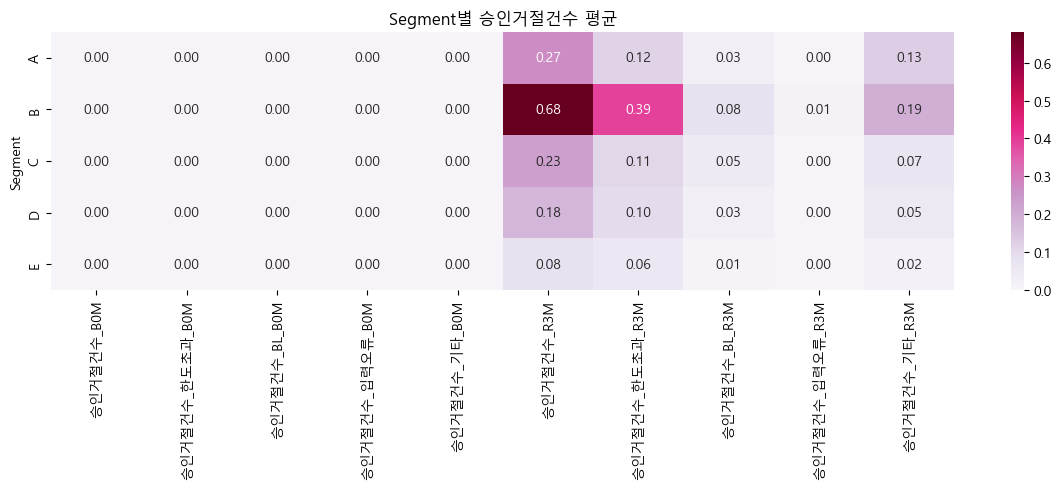

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 5))
sns.heatmap(거절_세그.set_index('Segment'), annot=True, fmt=".2f", cmap='PuRd')
plt.title("Segment별 승인거절건수 평균")
plt.tight_layout()
plt.show()

In [27]:
# 예: 승인매출정보에 있는 경우
이용금액대_컬럼 = [col for col in 승인매출정보.columns if '이용금액대' in col]
print("이용금액대 컬럼 목록:", 이용금액대_컬럼)

이용금액대 컬럼 목록: ['이용금액대']


In [29]:
# 각 컬럼별 고유값 출력
for col in 이용금액대_컬럼:
    고유값 = 승인매출정보[col].dropna().unique()
    print(f"{col} 고유값: {sorted(고유값)}")

이용금액대 고유값: ['01.100만원+', '02.50만원+', '03.30만원+', '04.10만원+', '05.10만원-', '09.미사용']


In [30]:
# 예시: 최근 월 기준 컬럼명 (데이터에 따라 변경 가능)
이용금액대_컬럼 = '이용금액대'

# ID + 이용금액대만 추출
이용금액대_df = 승인매출정보[['ID', 이용금액대_컬럼]]

In [31]:
# Segment 병합
회원정보_sub = 회원정보[['ID', 'Segment']].drop_duplicates()
이용금액대_df = pd.merge(이용금액대_df, 회원정보_sub, on='ID', how='left')

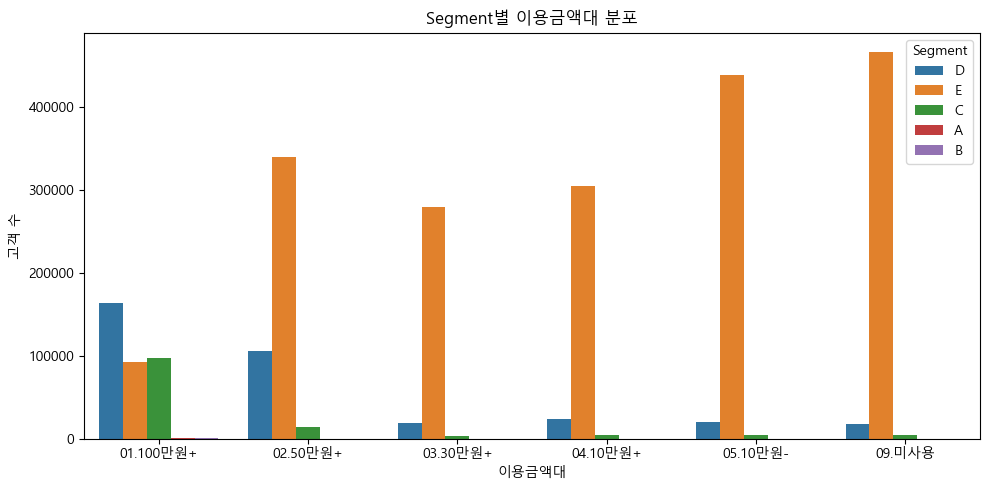

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 순서 정의 (코드값 순서대로)
금액대_순서 = ['01.100만원+', '02.50만원+', '03.30만원+', '04.10만원+', '05.10만원-', '09.미사용']

# 시각화
plt.figure(figsize=(10, 5))
sns.countplot(data=이용금액대_df, x=이용금액대_컬럼, hue='Segment', order=금액대_순서)
plt.title("Segment별 이용금액대 분포")
plt.xlabel("이용금액대")
plt.ylabel("고객 수")
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

In [33]:
# 교차표: Segment x 이용금액대 count
cross = pd.crosstab(이용금액대_df['Segment'], 이용금액대_df[이용금액대_컬럼])

# 각 세그먼트 내에서 비율 계산
비율표 = cross.div(cross.sum(axis=1), axis=0) * 100  # 비율(%)로 변환

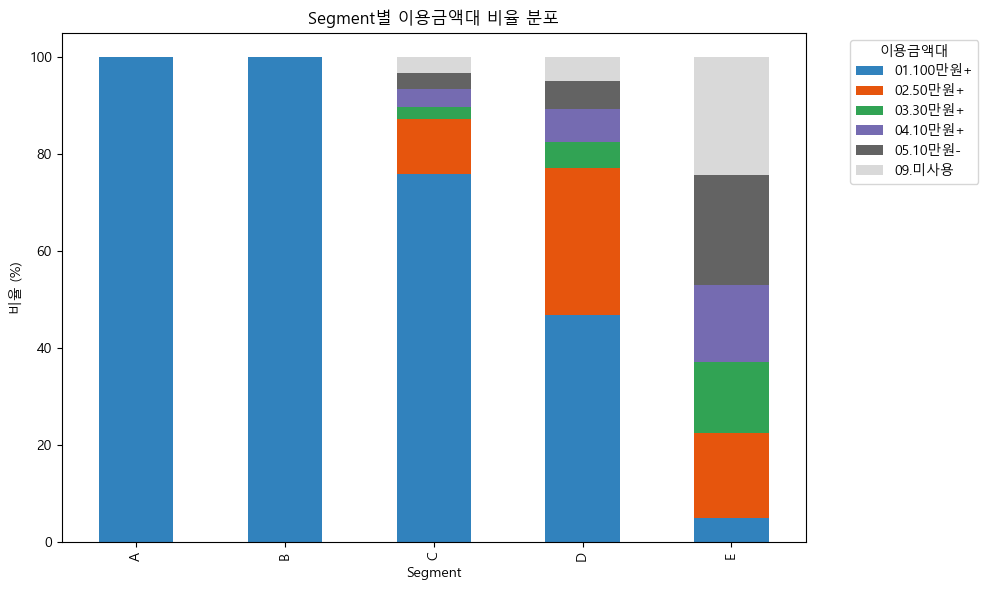

In [34]:
비율표 = 비율표[[
    '01.100만원+', '02.50만원+', '03.30만원+',
    '04.10만원+', '05.10만원-', '09.미사용'
]]  # 컬럼 순서 지정

비율표.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20c')
plt.title("Segment별 이용금액대 비율 분포")
plt.ylabel("비율 (%)")
plt.xlabel("Segment")
plt.legend(title='이용금액대', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()